In [140]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
def resize_image(image, width, height):
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

In [142]:
# load pathogen image
# data train
width = 1376
height = 1032

pathogen_image_ebo_train = []
for no in range(6111, 6158):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"train/Ebola/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_ebo_train.append(imnow)

pathogen_image_cow_train = []
for no in range(5972, 6005):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"train/Cowpox/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_cow_train.append(imnow)


# data test
pathogen_image_ebo_test = []
for no in range(6111, 6158):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"test/Ebola/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_ebo_test.append(imnow)

pathogen_image_cow_test = []
for no in range(5972, 6005):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"test/Cowpox/{fn}", 0)
    if type(imnow) == type(None):
        continue
    pathogen_image_cow_test.append(imnow)

pathogen_image_ebo_test = []
for no in range(6111, 6158):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"test/Ebola/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_ebo_test.append(imnow)

pathogen_image_cow_test = []
for no in range(5972, 6005):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"test/Cowpox/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_cow_test.append(imnow)


# data validation
pathogen_image_ebo_validation = []
for no in range(6110, 6160):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"validation/Ebola/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_ebo_validation.append(imnow)

pathogen_image_cow_validation = []
for no in range(5972, 5995):
    fn = f"{no}.tif"
    imnow = cv2.imread(f"validation/Cowpox/{fn}", 0)
    if type(imnow) == type(None):
        continue
    imnow = resize_image(imnow, width, height)
    pathogen_image_cow_validation.append(imnow)

In [143]:
# Split dataset
X_train = np.array(pathogen_image_ebo_train + pathogen_image_cow_train)
y_train = np.array([0] * len(pathogen_image_ebo_train) + [1] * len(pathogen_image_cow_train))

X_test = np.array(pathogen_image_ebo_test + pathogen_image_cow_test)
y_test = np.array([0] * len(pathogen_image_ebo_test) + [1] * len(pathogen_image_cow_test))

X_valid = np.array(pathogen_image_ebo_validation + pathogen_image_cow_validation)
y_valid = np.array([0] * len(pathogen_image_ebo_validation) + [1] * len(pathogen_image_cow_validation))

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((47, 1032, 1376), (47,), (18, 1032, 1376), (18,), (15, 1032, 1376), (15,))

In [145]:
class_names = ["Ebola", "Cowpox"]

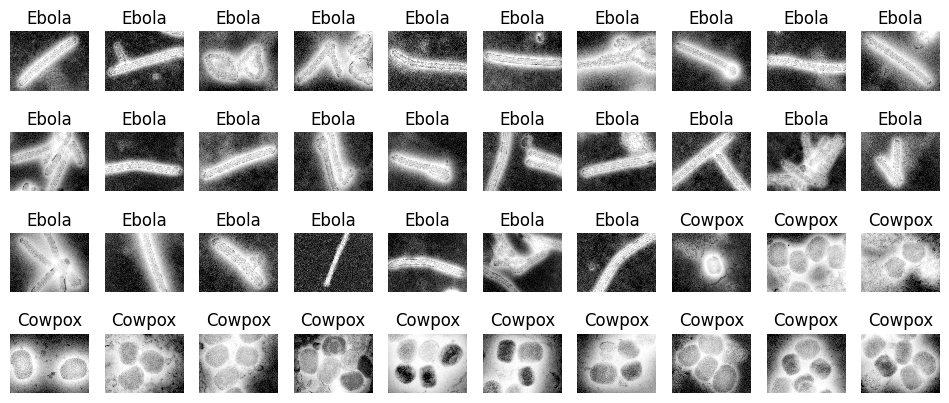

In [146]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [147]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X_train.shape[1], X_train.shape[2]]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [148]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 1420032)           0         
                                                                 
 dense_18 (Dense)            (None, 300)               426009900 
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 426,041,010
Trainable params: 426,041,010
Non-trainable params: 0
_________________________________________________________________


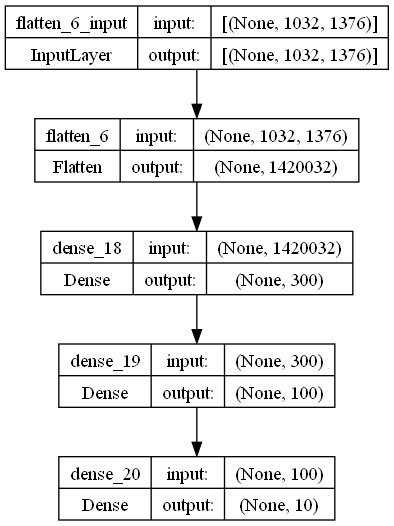

In [149]:
keras.utils.plot_model(model, "panthogen_klasifikasi_model.png", show_shapes=True)

In [150]:
hidden1 = model.layers[1]
hidden1.name

'dense_18'

In [151]:
model.get_layer(hidden1.name) is hidden1

True

In [152]:
weights, biases = hidden1.get_weights()

In [153]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [154]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [155]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2/2 [==============================] - 30s 3s/step - loss: 111121296.0000 - accuracy: 0.1915 - val_loss: 224193169682595840.0000 - val_accuracy: 0.2667
Epoch 2/30
2/2 [==============================] - 4s 2s/step - loss: 558421271184932864.0000 - accuracy: 0.5745 - val_loss: 9470893621248.0000 - val_accuracy: 0.2667
Epoch 3/30
2/2 [==============================] - 3s 2s/step - loss: 4121355878400.0000 - accuracy: 0.6170 - val_loss: 916458880.0000 - val_accuracy: 0.6667
Epoch 4/30
2/2 [==============================] - 3s 2s/step - loss: 2.2909 - accuracy: 0.5745 - val_loss: 916458880.0000 - val_accuracy: 0.6667
Epoch 5/30
2/2 [==============================] - 3s 2s/step - loss: 2.2825 - accuracy: 0.5745 - val_loss: 916458880.0000 - val_accuracy: 0.6667
Epoch 6/30
2/2 [==============================] - 4s 2s/step - loss: 2.2740 - accuracy: 0.5745 - val_loss: 916458880.0000 - val_accuracy: 0.6667
Epoch 7/30
2/2 [==============================] - 3s 2s/step - loss: 2.2655 - a

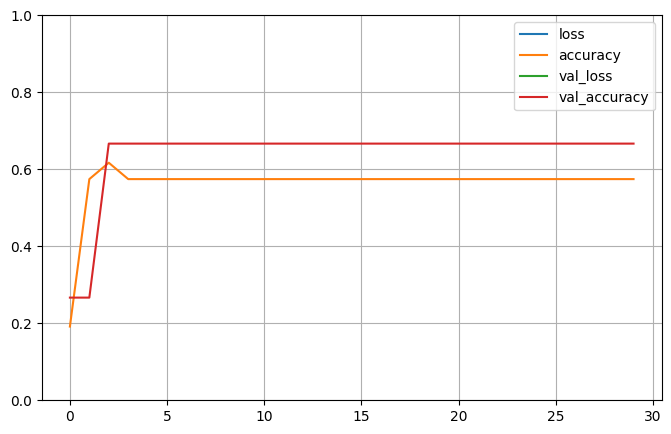

In [156]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [157]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 360ms/step - loss: 447147808.0000 - accuracy: 0.7222


[447147808.0, 0.7222222089767456]

1/1 [==============================] - 0s 223ms/step


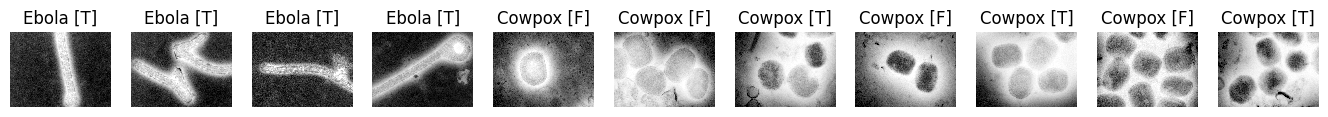

In [158]:
start = 7
end = 20

X_new = X_test[start:end]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

np.array(class_names)[y_pred]

y_new = y_test[start:end]
plt.figure(figsize=(20, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, end-start, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    pred = ""
    if y_pred[index] == y_new[index]:
        pred = "T"
    else:
        pred = "F"
    plt.title(f"{class_names[y_new[index]]} [{pred}]", fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()